In [ ]:
import pandas as pd
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**From the above information we get to know that all the features are of object type, and the data is balanced and not skewed data.**

In [ ]:
df.duplicated().sum() ## checking of duplicate data

0

In [ ]:
df.isnull().sum() ## checking for null

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**No null values are present**

# Exploratory Data Analysis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

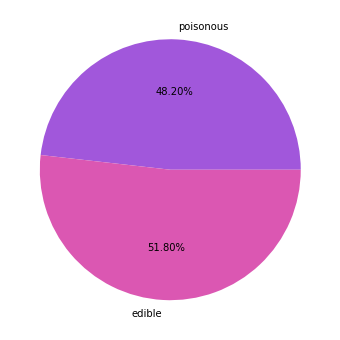

In [ ]:
plt.figure(figsize=(6, 6))
mushrooms = ['poisonous','edible']
count = [len(df[df['class'] == 'p']),len(df[df['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Data is balanced**

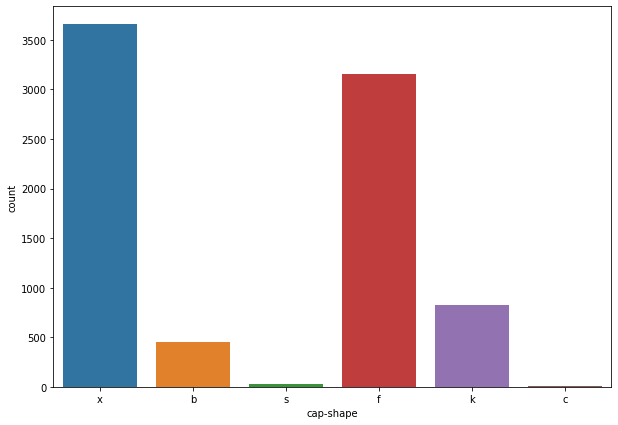

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='cap-shape')

**Fromthe Above graph we get the following observation (bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s)
convex,flat are of in majority  then bell,knobbed are then followed and sunken and conical are negligible**   

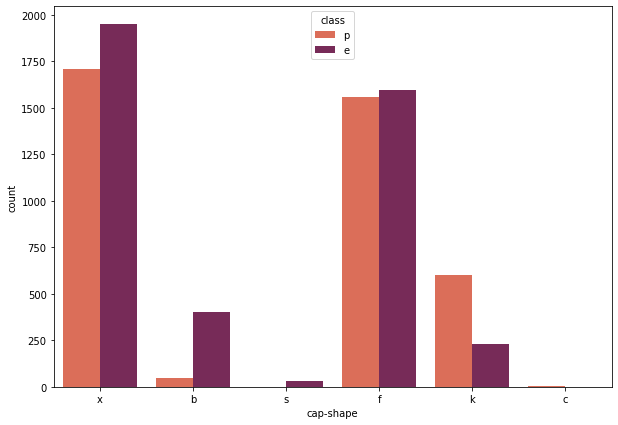

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='cap-shape',hue='class',palette='rocket_r')

**From the above graph we get the information that all the catagory are pesses both eidible and poisonous mushrooms**

In [ ]:
df.groupby('cap-shape')['class'].value_counts()

cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          p         600
           e         228
s          e          32
x          e        1948
           p        1708
Name: class, dtype: int64



1.  **All conical mushrooms are poisonous**
2.  **All sunken mushrooms edible**



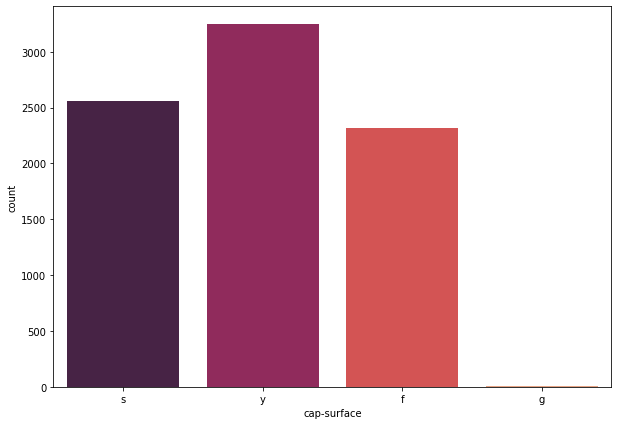

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='cap-surface',palette='rocket')

**From the above observation we get ( fibrous=f,grooves=g,scaly=y,smooth=s)**


1. **Scaly=y is more**
2. **smooth=s**
3. **fibrous=f**
4. **grooves=g**
**Arranged in decending order of occurance** 



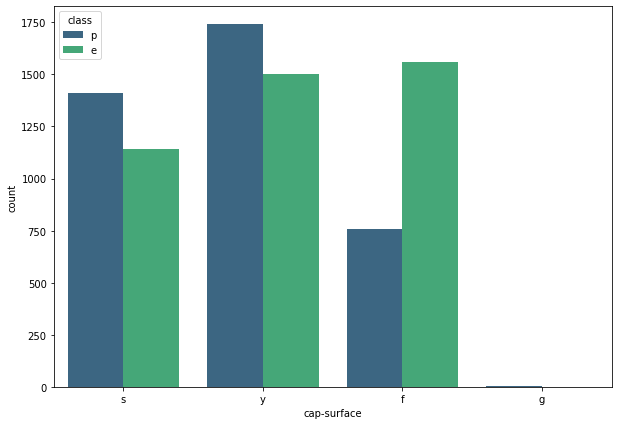

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='cap-surface',hue='class',palette='viridis')

**From the above observation we get ( fibrous=f,grooves=g,scaly=y,smooth=s)**

1. **Scaly=y is more**
2. **smooth=s**
3. **fibrous=f**
**All has both eidble and poisonous mushrooms**

**Lets check what grooves=g has eidble or poisonous**





In [ ]:
df.groupby('cap-surface')['class'].value_counts()

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64

**It is clear that grooves=g is poisonus in total**

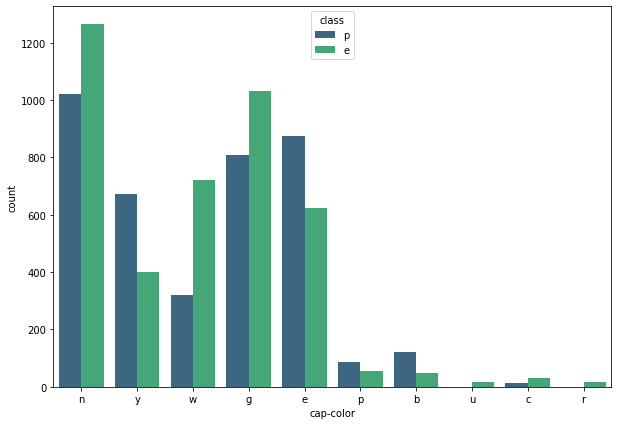

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='cap-color',hue='class',palette='viridis')

**From the above graph we get the information that (brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y)
cinnamon=c,purple=u,green=r are not very much distinguishable among eidible and poisonous catagory**

In [ ]:
## lets find out
df.groupby('cap-color')['class'].value_counts()

cap-color  class
b          p         120
           e          48
c          e          32
           p          12
e          p         876
           e         624
g          e        1032
           p         808
n          e        1264
           p        1020
p          p          88
           e          56
r          e          16
u          e          16
w          e         720
           p         320
y          p         672
           e         400
Name: class, dtype: int64

**cinnamon=c(both),purple=u(eidble),green=r(eidble)** 

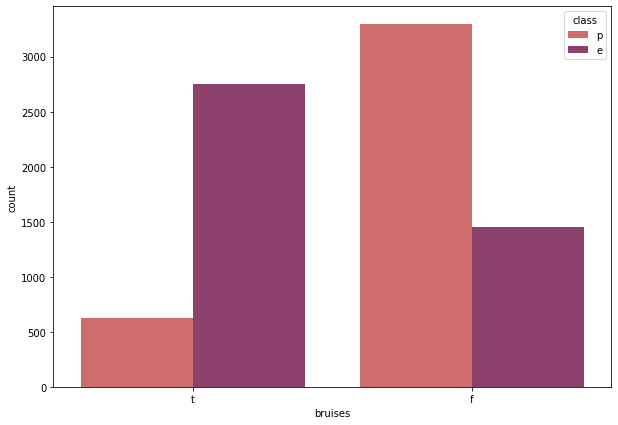

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='bruises',hue='class',palette='flare')

**From Above we can see that both the catagory of mushroom that is bruises and non-bruises  have both eadible and poisonus type**

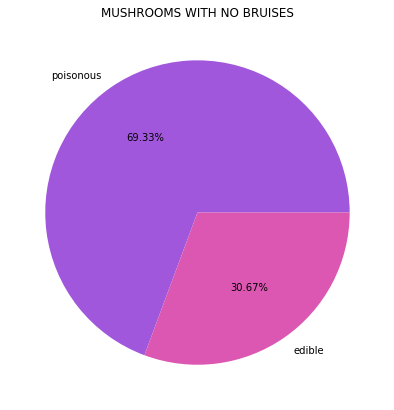

In [ ]:
plt.figure(figsize=(10, 7))
classx = ['poisonous','edible']
df2 = df[df['bruises'] == 'f']
count = [len(df2[df2['class'] == 'p']),len(df2[df2['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH NO BRUISES')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Mushroom with no bruises are more poisonous**

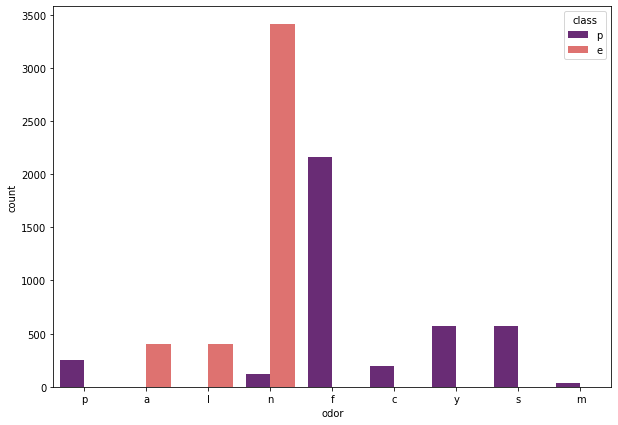

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='odor',hue='class',palette='magma')
plt.show()



1.   **Pungent,foul,creosote,fishy,spicy,musty smelling mushrooms are poisnous**
2.   **Anise,almond smelling mushrooms are edible**



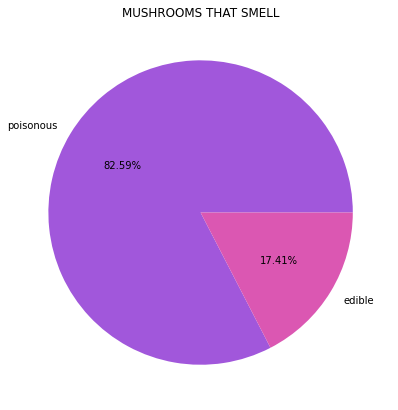

In [ ]:
plt.figure(figsize=(10, 7))
clasx = ['poisonous','edible']
df2 = df[df['odor'] != 'n']
plt.title('MUSHROOMS THAT SMELL')
count = [len(df2[df2['class'] == 'p']),len(df2[df2['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Mushroom that are more poisonous that smells**

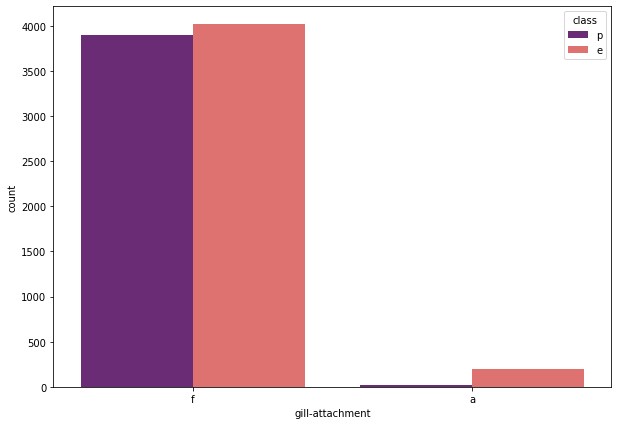

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='gill-attachment',hue='class',palette='magma')
plt.show()

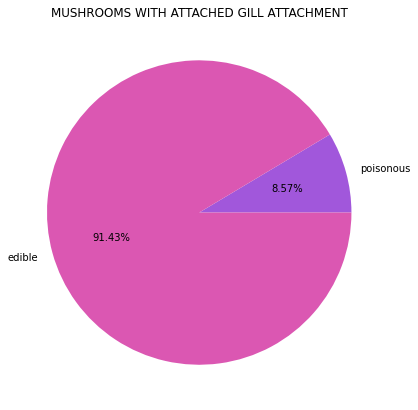

In [ ]:
plt.figure(figsize=(10, 7))
clasx = ['poisonous','edible']
df2 = df[df['gill-attachment'] != 'f']
count = [len(df2[df2['class'] == 'p']),len(df2[df2['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH ATTACHED GILL ATTACHMENT')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Mushroom with attached gills are more edible**

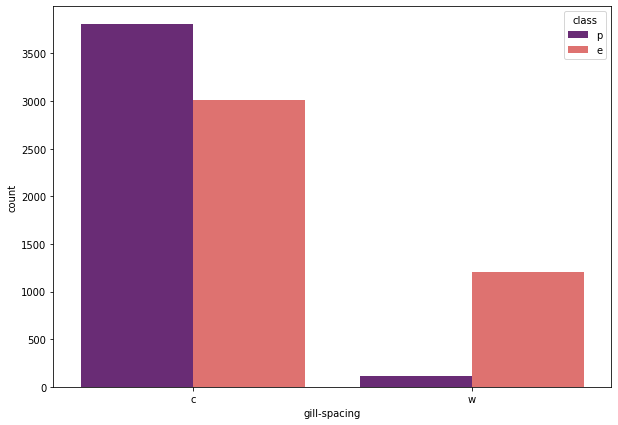

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='gill-spacing',hue='class',palette='magma')
plt.show()

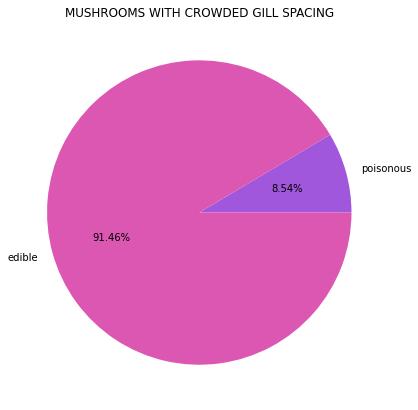

In [ ]:
plt.figure(figsize=(10, 7))
clasx = ['poisonous','edible']
df2 = df[df['gill-spacing'] != 'c']
count = [len(df2[df2['class'] == 'p']),len(df2[df2['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH CROWDED GILL SPACING')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Mushroom that are more crowded gill spacing are edible**

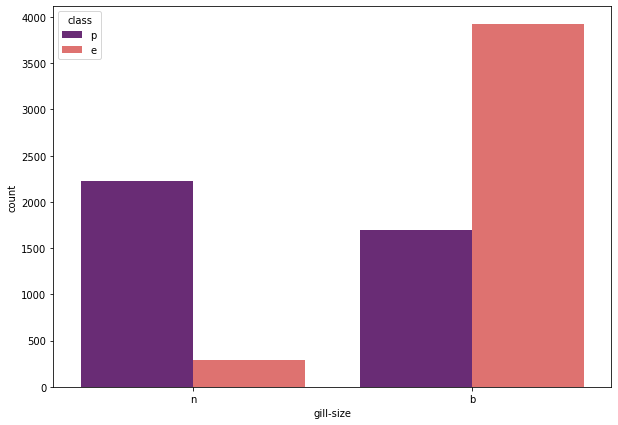

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='gill-size',hue='class',palette='magma')
plt.show()

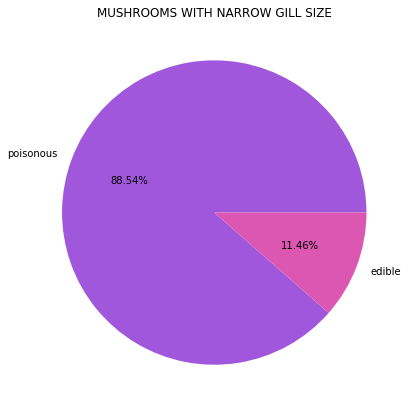

In [ ]:
plt.figure(figsize=(10, 7))
clasx = ['poisonous','edible']
df2 = df[df['gill-size'] != 'b']
count = [len(df2[df2['class'] == 'p']),len(df2[df2['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH NARROW GILL SIZE')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Hear we see that Mushroom with broad gill size are eidible as with narrow gill size it is poisonous**

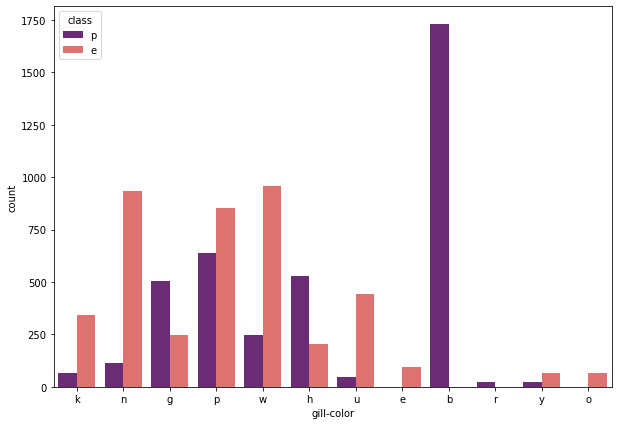

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='gill-color',hue='class',palette='magma')
plt.show()

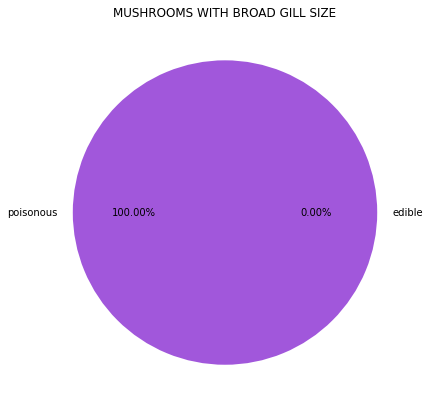

In [ ]:
plt.figure(figsize=(10, 7))
clasx = ['poisonous','edible']
df2 = df[df['gill-color'] == 'b']
count = [len(df2[df2['class'] == 'p']),len(df2[df2['class'] == 'e'])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH BROAD GILL SIZE')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()



1.  **Mushrooms with gill color buff,green are poisonous**
2.  **Red,orange are edible**




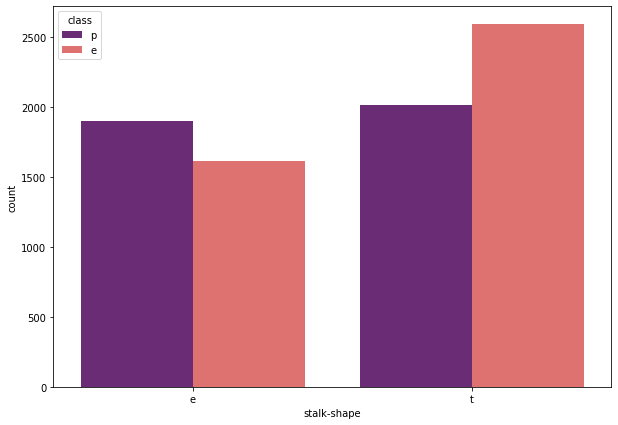

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='stalk-shape',hue='class',palette='magma')
plt.show()

**The feature "stalk-shape" equally contribute to both edible/poisonous catagories**

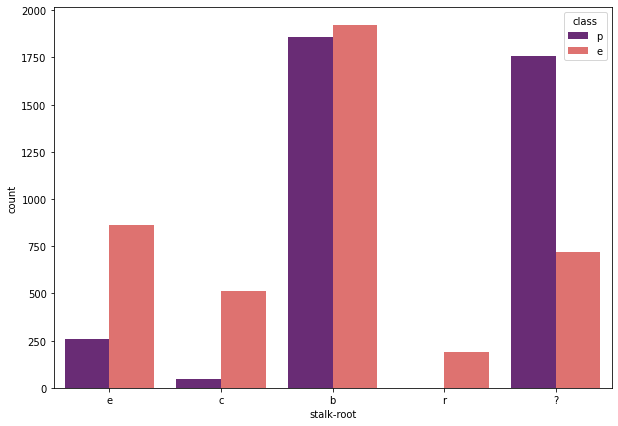

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='stalk-root',hue='class',palette='magma')
plt.show()

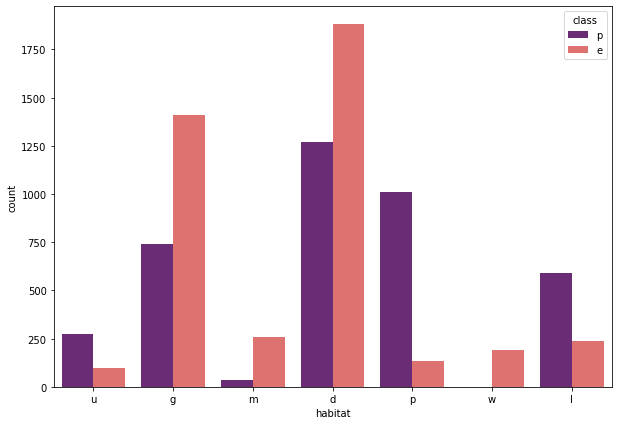

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df,x='habitat',hue='class',palette='magma')
plt.show()

#Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

mappings = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [ ]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

**Dropping the target column** 

In [ ]:
y = df['class']
X = df.drop('class', axis=1) ## axis=1 means dropping the value column wise

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,-1.045952,0.683778,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


**Splitting the processed data set into training and test data set**

#Model Building

#Logistic Regression

In [ ]:
# splitting data in training set(70%) and test set(30%).
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.3,random_state=9)


lr = LogisticRegression() #create the object of the model
lr = lr.fit(trainx,trainy)# whole training, forward+backp
act = accuracy_score(trainy,lr.predict(trainx))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  96.07808652831517


In [ ]:
act1 = accuracy_score(testy,lr.predict(testx)) ## Testing accuracy with test data
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  95.36505332239541


**Calculating the validation parameters**

In [ ]:
pc= precision_score(testy,lr.predict(testx))
print('precision score is: ',(pc*100))
rc= recall_score(testy,lr.predict(testx))
print('recall score is: ',(rc*100))
f1= f1_score(testy,lr.predict(testx))
print('f1 score is: ',(f1*100))

precision score is:  95.11343804537522
recall score is:  95.03051438535309
f1 score is:  95.07195813344961


# Random Forest Classifier

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
clr_rf = clf_rf.fit(trainx,trainy)
act = accuracy_score(trainy,clf_rf.predict(trainx))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  100.0


**Testing accuracy with test data**

In [ ]:
act1 = accuracy_score(testy,clr_rf.predict(testx))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  100.0


**Calculating the validation parameters**

In [ ]:
pc= precision_score(testy,clr_rf.predict(testx))
print('precision score is: ',(pc*100))
rc= recall_score(testy,clr_rf.predict(testx))
print('recall score is: ',(rc*100))
f1= f1_score(testy,clr_rf.predict(testx))
print('f1 score is: ',(f1*100))

precision score is:  100.0
recall score is:  100.0
f1 score is:  100.0


# Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(trainx,trainy)
act = accuracy_score(trainy,decision_tree.predict(trainx))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  100.0


**Testing accuracy with test data**

In [ ]:
act1 = accuracy_score(testy,decision_tree.predict(testx))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  100.0


**Calculating the validation parameters**

In [ ]:
pc= precision_score(testy,decision_tree.predict(testx))
print('precision score is: ',(pc*100))
rc= recall_score(testy,decision_tree.predict(testx))
print('recall score is: ',(rc*100))
f1= f1_score(testy,decision_tree.predict(testx))
print('f1 score is: ',(f1*100))

precision score is:  100.0
recall score is:  100.0
f1 score is:  100.0


# Conclusion

 Logistic regression as the best model over Random Forest Classifier and Decision Tree Classifer 